# Estimation of Daily Fermentation Product Release - Analysis for British Reference Diet (Figure 2)

# Make sure to run Figure3 script first when running script

In [1]:
#load required functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorav='k'
colorrefdiet='purple'
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"

results_for_figure2={}
import FPcalc #basic calculations of 

#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}


print(BRD["fecalwetmass"])
print(BRD)

117.72413793103448
{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI': 44.6025, 'carbLI_low': 31.264999999999997, 'carbLI_high': 57.410000000000004, 'carbLI_error': 13.072500000000003, 'bacwetweight': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'fecealfractionbacstd': 0.05063458414079364, 'bacterialdrymass_feces': 16.180367816091955, 'bacterialdrymass_feces_error': 4.014685909630688, 'energybacteria_fromfeces': 101.11785577697411, 'FP_fromfeces': 471.0230005849163, 'FP_fromfeces_g': [10.904335695602317, 2.153651111637971, 5.520037668578593, 6.865692286187041, 2.47897326682256, 4.179730053279632], 'FP_fromfeces_gsum': 32.10242008210811, 'energyfrac_fromfeces': 0.04444740913273587, 'energybacteria_fromfeces_error': 25.20015915064229, 'energyfrac_fromfeces_error': 0.011076

# Calculation fermentation products / energy contribution for British diet (via feces)


In [3]:
#start with calculating bacterial dry mass
print("av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)")


BRD["bacterialdrymass_feces"]=BRD["fecaldrymass"]*BRD["fecealfractionbac"]


#calculate energy fraction
BRD["energybacteria_fromfeces"],ferc,BRD["FP_fromfeces"],BRD["FP_fromfeces_g"],BRD["FP_fromfeces_gsum"],totalcarb,orderc,BRD["bacterialdrymass_feces"]=FPcalc.energycalc(BRD["bacterialdrymass_feces"],scenario='reference',calctype='from_feces')
BRD["energyfrac_fromfeces"]=BRD["energybacteria_fromfeces"]/BRD["energy"]

#totenergy,totfermlist,totfermlist_sum,totfermlist_gram,totfermlist_gram_sum,totfem_carb,order,bacdrymass #returns energy of fermentation products (in kcal) and 
print(BRD)

print(BRD["energybacteria_fromfeces"])
print(BRD["energy"])
print(BRD["energyfrac_fromfeces"])

#####
#calculate relative errors
#####

#relative error accumulates
relerror=np.sqrt(np.power(BRD["fecaldrymassstd"]/BRD["fecaldrymass"],2)+np.power(BRD["fecealfractionbacstd"]/BRD["fecealfractionbac"],2)) #takes fecal mass variation and fraction bac dry mass into account

BRD["energybacteria_fromfeces_error"]=relerror*BRD["energybacteria_fromfeces"]
BRD["energyfrac_fromfeces_error"]=relerror*BRD["energyfrac_fromfeces"]
BRD["FP_fromfeces_error"]=relerror*BRD["FP_fromfeces"]



av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)
{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI': 44.6025, 'carbLI_low': 31.264999999999997, 'carbLI_high': 57.410000000000004, 'carbLI_error': 13.072500000000003, 'bacwetweight': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'fecealfractionbacstd': 0.05063458414079364, 'bacterialdrymass_feces': 16.180367816091955, 'bacterialdrymass_feces_error': 4.014685909630688, 'energybacteria_fromfeces': 101.11785577697411, 'FP_fromfeces': 471.0230005849163, 'FP_fromfeces_g': [10.904335695602317, 2.153651111637971, 5.520037668578593, 6.865692286187041, 2.47897326682256, 4.179730053279632], 'FP_fromfeces_gsum': 32.10242008210811, 'energyfrac_fromfeces': 0.0444474091

# Calculation energy contribution of bacteira for British ref diet (via carb content)

In [30]:
#todo: check if energy calculations, why are the numbers so different for the different ways to estimate?

In [4]:
BRD["energy_fromcarbs"],BRD["FPlist_fromcarbs"],BRD["FP_fromcarbs"],BRD["FP_fromcarbs_g"],BRD["FP_fromcarbs_gsum"],BRD["ferm_fromcarbs_cc"],order,BRD["drymass_fromcarbs"]=FPcalc.energycalc(BRD["carbLI"],scenario='reference',calctype='from_carbs')
BRD["energyfrac_fromcarbs"]=BRD["energy_fromcarbs"]/BRD["energy"]
#return totenergy,totfermlist,totfermlist_sum,totfermlist_gram,totfermlist_gram_sum,totfem_carb,order,bacdrymass #returns energy of fermentation products (in kcal) and amount of fermentation products (in mmol)

#errors from variation in carbon
relerror=BRD["carbLI_error"]/BRD["carbLI"]
BRD["FP_fromcarbs_error"]=relerror*BRD["FP_fromcarbs"]
BRD["FP_fromcarbs_gsum_error"]=relerror*BRD["FP_fromcarbs_gsum"]
BRD["drymass_fromcarbs_error"]=relerror*BRD["drymass_fromcarbs"]
BRD["energy_fromcarbs_error"]=relerror*BRD["energy_fromcarbs"]
BRD["energyfrac_fromcarbs_error"]=relerror*BRD["energyfrac_fromcarbs"]


# Look into carbon balance (for via carbohydrate estimation)

## look at the numbers together with Markus. Double check: ASSUMED CARBON NUMBERS, DOUBLE CHECK CARBS PER CELL

In [6]:
print("********used av. yield and excretion*******")

with open(os.path.join("data_analysisresults/average_excretion/av_YCA.json")) as f:
        yielddict = json.load(f)
print("carbon total secretion mmolC/g")
print(yielddict["total_secretion_carbon"])
print("carbon uptake mmolC/g")
print(yielddict["uptake_carbon"])


print("********carbon input*******")
print("carbon in LI in g")
print(BRD["carbLI"])
print("carbon in LI in mmol")
print(BRD["carbLI"]/0.180 )
print("carbon in LI in mmol carbon units")
print(BRD["carbLI"]*6/0.180)


print("********carbon in excreted fermentation products *******")
print("order FP list")
print(order)
print("used carbon per FP")
cfactorlist=np.array([2,4,1,3,2,4])
print(cfactorlist)

print("daily secretion in mmol FP/day")
print(np.array(BRD["FPlist_fromcarbs"]))
print("daily secretion in mmol C/day")
print(np.array(BRD["FPlist_fromcarbs"])*cfactorlist)
print("total daily secretion mmol C/ day")
print(np.sum(np.array(BRD["FPlist_fromcarbs"])*cfactorlist))

print("********carbon in bacteria*******")
print("bacterial drymass in g")
print(BRD["drymass_fromcarbs"])
print("bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb")
print("DOUBLECHECK 0.5 factor correct?")
print(BRD["drymass_fromcarbs"]*0.5)
print("bacterial drymass - carb atoms in mmol")
print(BRD["drymass_fromcarbs"]*0.5/0.012) #assumes 12g/mol or 0.012g/mmol


********used av. yield and excretion*******
carbon total secretion mmolC/g
62.916710240208815
carbon uptake mmolC/g
69.9713022308811
********carbon input*******
carbon in LI in g
44.6025
carbon in LI in mmol
247.79166666666666
carbon in LI in mmol carbon units
1486.75
********carbon in excreted fermentation products *******
order FP list
['acetate', 'butyrate', 'formate', 'lactate', 'propionate', 'succinate']
used carbon per FP
[2 4 1 3 2 4]
daily secretion in mmol FP/day
[238.25365754  32.07140511 157.35078207 100.00547954  43.90809261
  46.44114842]
daily secretion in mmol C/day
[476.50731508 128.28562045 157.35078207 300.01643861  87.81618523
 185.76459366]
total daily secretion mmol C/ day
1335.7409351051679
********carbon in bacteria*******
bacterial drymass in g
21.230304795108673
bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb
DOUBLECHECK 0.5 factor correct?
10.615152397554336
bacterial drymass - carb atoms in mmol
884.596033129528


# same carbon analysis but for different media

In [7]:
for media in ["YCA","epsilon","gamma","BHI"]:
    curengery,curFPlist,curFP,curFPg,curFPgsum,curFPcc,order,curdryweight=FPcalc.energycalc(BRD["carbLI"],scenario='reference',calctype='from_carbs',dict_yielddata="average_excretion/av_"+media+".json")

    print("************************")
    print("*********MEDIA: "+media)
    print("********used av. yield and excretion*******")

    with open(os.path.join("data_analysisresults/average_excretion/av_"+media+".json")) as f:
            yielddict = json.load(f)
    print("carbon total secretion mmolC/g")
    print(yielddict["total_secretion_carbon"])
    print("carbon uptake mmolC/g")
    print(yielddict["uptake_carbon"])


    print("********carbon input*******")
    #print("carbon in LI in g")
    #print(BRD["carbLI"])
    #print("carbon in LI in mmol")
    #print(BRD["carbLI"]/0.180 )
    print("carbon in LI in mmol carbon units")
    print(BRD["carbLI"]*6/0.180)


    print("********carbon in excreted fermentation products *******")
    #print("order FP list")
    #print(order)
    #print("used carbon per FP")
    #cfactorlist=np.array([2,4,1,3,2,4])
    #print(cfactorlist)

    #print("daily secretion in mmol FP/day")
    #print(np.array(curFPlist))
    #print("daily secretion in mmol C/day")
    #print(np.array(curFPlist)*cfactorlist)
    print("total daily secretion mmol C/ day")
    print(np.sum(np.array(curFPlist)*cfactorlist))

    print("********carbon in bacteria*******")
    #print("bacterial drymass in g")
    #print(curdryweight)
    #print("bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb")
    #print("DOUBLECHECK 0.5 factor correct?")
    #print(curdryweight*0.5)
    print("bacterial drymass - carb atoms in mmol")
    print(curdryweight*0.5/0.012) #assumes 12g/mol or 0.012g/mmol


************************
*********MEDIA: YCA
********used av. yield and excretion*******
carbon total secretion mmolC/g
62.916710240208815
carbon uptake mmolC/g
69.9713022308811
********carbon input*******
carbon in LI in mmol carbon units
1486.75
********carbon in excreted fermentation products *******
total daily secretion mmol C/ day
1335.7409351051679
********carbon in bacteria*******
bacterial drymass - carb atoms in mmol
884.596033129528
************************
*********MEDIA: epsilon
********used av. yield and excretion*******
carbon total secretion mmolC/g
72.83729866435785
carbon uptake mmolC/g
79.35858319240998
********carbon input*******
carbon in LI in mmol carbon units
1486.75
********carbon in excreted fermentation products *******
total daily secretion mmol C/ day
1363.4402505410467
********carbon in bacteria*******
bacterial drymass - carb atoms in mmol
779.9576793889208
************************
*********MEDIA: gamma
********used av. yield and excretion*******
carbon t

# SIMPLE comparion plot

0.04444740913273587


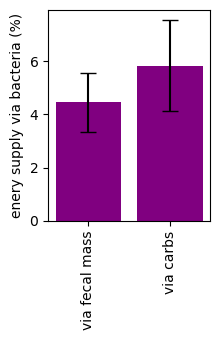

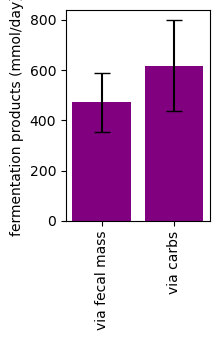

In [8]:
#compare different estimations (from fecal weight, and from carbs reaching LI

#
#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

print(BRD["energyfrac_fromfeces"])
axs[0].bar([1,2],[BRD["energyfrac_fromfeces"]*100,BRD["energyfrac_fromcarbs"]*100],yerr=[100*BRD["energyfrac_fromfeces_error"],100*BRD["energyfrac_fromcarbs_error"]],color=[colorrefdiet,colorrefdiet],capsize=capsize)
#
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel(labelenergybacfrac)
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI.pdf")


#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2],[BRD["FP_fromfeces"],BRD["FP_fromcarbs"]],yerr=[BRD["FP_fromfeces_error"],BRD["FP_fromcarbs_error"]],color=[colorrefdiet,colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("fermentation products (mmol/day)")
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2.pdf")









## Fig. S2: Add figure how "carbs available for microbiota" changes with fiber digestion fraction and starch absorbance
--> Standard: 0.5 fiber digestion, 0.1 starch passage #Englyst. Fiber unclear, but we show that it does not matter much for British ref diet
e.g. panel: vary fiber digestion fraction on x-axis (show different lines for starch passage (0.05,0.1,0.15)
possible: add other panel showing how total FPs change with fiber digestion fraction



# Plots total amount of fermentation products reaching large intestine

For Fig. S
add as a side point how little of those fermentation products are recovered in feces


# main results British reference diet in one plot

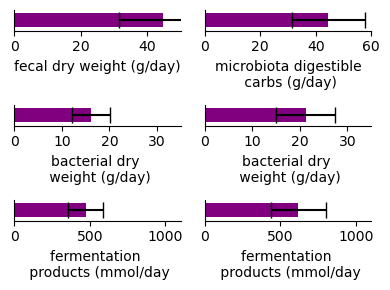

In [9]:
fig, axs = plt.subplots(3,2, figsize=(4,3))


####from carb calculation

#carbs
axs[0,1].barh(1,BRD["carbLI"],height=0.7,xerr=BRD["carbLI_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0,1].set_xlabel("microbiota digestible\n carbs (g/day)")
#bacterial dry mass
axs[1,1].barh(1,BRD["drymass_fromcarbs"],height=0.7,xerr=BRD["drymass_fromcarbs_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[1,1].set_xlabel("bacterial dry \n weight (g/day)")
#femrentation products
axs[2,1].barh(1,BRD["FP_fromcarbs"],height=0.7,xerr=BRD["FP_fromcarbs_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[2,1].set_xlabel("fermentation \n products (mmol/day")

#colors=[colorrefdiet]*2
#for patch, color in zip(bplot1['boxes'], colors):
#        patch.set_facecolor(color)
#axs[0].set_xlabel('bacterial dry mass (g/day)')
#axs[0].set_xlim(0,30)

####from feces calculation

#########
#feces
#########
axs[0,0].barh(1,BRD["carbLI"],height=0.7,xerr=BRD["carbLI_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0,0].set_xlabel("fecal dry weight (g/day)")
#bacterial dry mass
axs[1,0].barh(1,BRD["bacterialdrymass_feces"],height=0.7,xerr=BRD["bacterialdrymass_feces_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[1,0].set_xlabel("bacterial dry \n weight (g/day)")
#femrentation products
axs[2,0].barh(1,BRD["FP_fromfeces"],height=0.7,xerr=BRD["FP_fromfeces_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[2,0].set_xlabel("fermentation \n products (mmol/day")

axs[0,0].set_xlim(0,50)
axs[0,1].set_xlim(0,60)
axs[1,0].set_xlim(0,35)
axs[1,1].set_xlim(0,35)
axs[2,0].set_xlim(0,1100)
axs[2,1].set_xlim(0,1100)


axs[0,0].set_yticks([])
axs[1,0].set_yticks([])
axs[2,0].set_yticks([])
axs[0,1].set_yticks([])
axs[1,1].set_yticks([])
axs[2,1].set_yticks([])

axs[1,0].set_xticks([0,10,20,30])
axs[1,1].set_xticks([0,10,20,30])

ym=0.5
ymax=1.5
axs[0,0].set_ylim(ym,ymax)
axs[1,0].set_ylim(ym,ymax)
axs[2,0].set_ylim(ym,ymax)
axs[0,1].set_ylim(ym,ymax)
axs[1,1].set_ylim(ym,ymax)
axs[2,1].set_ylim(ym,ymax)

axs[0,0].spines[['right', 'top']].set_visible(False)
axs[1,0].spines[['right', 'top']].set_visible(False)
axs[2,0].spines[['right', 'top']].set_visible(False)
axs[0,1].spines[['right', 'top']].set_visible(False)
axs[1,1].spines[['right', 'top']].set_visible(False)
axs[2,1].spines[['right', 'top']].set_visible(False)


fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_mainnumbers.pdf")



# Fermentation products in feces

{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI': 44.6025, 'carbLI_low': 31.264999999999997, 'carbLI_high': 57.410000000000004, 'carbLI_error': 13.072500000000003, 'bacwetweight': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'fecealfractionbacstd': 0.05063458414079364, 'bacterialdrymass_feces': 16.180367816091955, 'bacterialdrymass_feces_error': 4.014685909630688, 'energybacteria_fromfeces': 101.11785577697411, 'FP_fromfeces': 471.0230005849163, 'FP_fromfeces_g': [10.904335695602317, 2.153651111637971, 5.520037668578593, 6.865692286187041, 2.47897326682256, 4.179730053279632], 'FP_fromfeces_gsum': 32.10242008210811, 'energyfrac_fromfeces': 0.04444740913273587, 'energybacteria_fromfeces_error': 25.20015915064229, 'energyfrac_fromfeces_error': 0.011076993033249358, 'FP_f

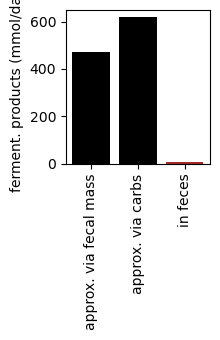

In [10]:
#how much mmol of fermentation products in feces
#typical value is 80mmol/l (or 76.8 mmol/l as reported in the following)
#https://pubmed.ncbi.nlm.nih.gov/6740214/
print(BRD)

BRD["FP_infeces"]=BRD["fecalwetmass"]*76.8/1000.
ferminfeces_upper=BRD["fecalwetmass"]*190/1000.
ferminfeces_lower=BRD["fecalwetmass"]*30/1000.
BRD["FP_infeces_error"]=(ferminfeces_upper-ferminfeces_lower)/2.
ferminfeces_g=BRD["FP_infeces"]*0.08 #assume roughly average


with open(os.path.join("data_analysisresults/average_excretion/av_YCA.json")) as f:
        yielddict2 = json.load(f)
print(yielddict2.items())

### read in json file with secretion data
fpinfeces_list=[]
sum_fp=0
sum_c=0
subc=-1
ccount=[2,4,1,3,4,2]
for sub in ["acetate","butyrate","formate","lactate","succinate","propionate"]:
    subc=subc+1
    fpinfeces_list.append(yielddict2[sub]*BRD["FP_infeces"]/yielddict["total_secretion"])
    sum_fp=sum_fp+fpinfeces_list[-1]
    sum_c=sum_c+fpinfeces_list[-1]*ccount[subc]
print("total secretion feces mmol/day:")
print(BRD["FP_infeces"])
print("different fp products (ace,but,for,lac,suc,prop, mmol/day):")
print(fpinfeces_list)
print(sum_fp)
print("C in different products mmol/day")
print(sum_c)



###calculate carbon content of FP in feces
###assume same consumption as secreted by bacteria

#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]
axs[0].bar([1,2,3],[BRD["FP_fromfeces"],BRD["FP_fromcarbs"],BRD["FP_infeces"]],color=['k','k','brown'])
        
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('ferment. products (mmol/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["approx. via fecal mass","approx. via carbs","in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_ferm_includeinfeces.pdf")


# Save numbers to dict

In [11]:
print(BRD)
with open('data_analysisresults/BRD_characteristics.json', 'w') as fp:
    json.dump(BRD, fp)

{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI': 44.6025, 'carbLI_low': 31.264999999999997, 'carbLI_high': 57.410000000000004, 'carbLI_error': 13.072500000000003, 'bacwetweight': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'fecealfractionbacstd': 0.05063458414079364, 'bacterialdrymass_feces': 16.180367816091955, 'bacterialdrymass_feces_error': 4.014685909630688, 'energybacteria_fromfeces': 101.11785577697411, 'FP_fromfeces': 471.0230005849163, 'FP_fromfeces_g': [10.904335695602317, 2.153651111637971, 5.520037668578593, 6.865692286187041, 2.47897326682256, 4.179730053279632], 'FP_fromfeces_gsum': 32.10242008210811, 'energyfrac_fromfeces': 0.04444740913273587, 'energybacteria_fromfeces_error': 25.20015915064229, 'energyfrac_fromfeces_error': 0.011076993033249358, 'FP_f